<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests



##### Your Code Here #####
df = pd.read_csv('data/job_listings.csv')           
df


Unnamed: 0                                        description  \
0             0  b"<div><div>Job Requirements:</div><ul><li><p>...   
1             1  b'<div>Job Description<br/>\n<br/>\n<p>As a Da...   
2             2  b'<div><p>As a Data Scientist you will be work...   
3             3  b'<div class="jobsearch-JobMetadataHeader icl-...   
4             4  b'<ul><li>Location: USA \xe2\x80\x93 multiple ...   
..          ...                                                ...   
421         421  b"<b>About Us:</b><br/>\nWant to be part of a ...   
422         422  b'<div class="jobsearch-JobMetadataHeader icl-...   
423         423  b'<div class="jobsearch-JobMetadataHeader icl-...   
424         424  b"<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...   
425         425  b'<div></div><div><div><div><div><p>Cerner Int...   

                                                 title  
0                                      Data scientist   
1                                     Data Scientist I  
2                         Data Scientist - Entry Level  
3                                       Data Scientist  
4                                       Data Scientist  
..                                                 ...  
421                       Senior Data Science Engineer  
422  2019 PhD Data Scientist Internship - Forecasti...  
423                         Data Scientist - Insurance  
424                              Senior Data Scientist  
425                                     Data Scientist  

[426 rows x 3 columns]

In [3]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [4]:
state = []

for i,x in enumerate(df['description']):
    soup = BeautifulSoup(df['description'][i], 'html.parser')
    state.append(soup.get_text())

state


['b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"',
 'b\'Job Description\\n\\nAs a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our cli

## 2) Use Spacy to tokenize the listings 

In [5]:
##### Your Code Here #####

import spacy
nlp = spacy.load("en_core_web_lg")


def tokenize(document):
    """
    input document

    :returns a tokenized lemma list
    """
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

state2 = []
for i,x in enumerate(state):
    
    state2.append(tokenize(state[i]))
    
    

In [6]:
state2

[['b"Job',
  'Requirements:\\nConceptual',
  'understanding',
  'machine',
  'Learning',
  'model',
  'like',
  'Nai\\xc2\\xa8ve',
  'Bayes',
  'K',
  'Means',
  'SVM',
  'Apriori',
  'Linear/',
  'Logistic',
  'Regression',
  'Neural',
  'Random',
  'Forests',
  'decision',
  'Trees',
  'K',
  'NN',
  'hand',
  'experience',
  '2',
  'them\\nintermediate',
  'expert',
  'level',
  'coding',
  'skill',
  'Python',
  'R.',
  'ability',
  'write',
  'function',
  'clean',
  'efficient',
  'datum',
  'manipulation',
  'mandatory',
  'role)\\nexposure',
  'package',
  'like',
  'numpy',
  'scipy',
  'Pandas',
  'Matplotlib',
  'etc',
  'Python',
  'ggplot2',
  'dplyr',
  'tidyR',
  'R\\nAbility',
  'communicate',
  'model',
  'finding',
  'Technical',
  'Non',
  'technical',
  'stake',
  'holders\\nhand',
  'experience',
  'SQL',
  'Hive',
  'similar',
  'programming',
  'language\\nMust',
  'past',
  'work',
  'GitHub',
  'Kaggle',
  'publish',
  'article\\nmaster',
  'degree',
  'Statist

In [7]:
len(state2)

426

In [13]:
state3 = []
for i,x in enumerate(state2):
    for i, y in enumerate(x):
        state3.append(y)
state3

['b"Job',
 'Requirements:\\nConceptual',
 'understanding',
 'machine',
 'Learning',
 'model',
 'like',
 'Nai\\xc2\\xa8ve',
 'Bayes',
 'K',
 'Means',
 'SVM',
 'Apriori',
 'Linear/',
 'Logistic',
 'Regression',
 'Neural',
 'Random',
 'Forests',
 'decision',
 'Trees',
 'K',
 'NN',
 'hand',
 'experience',
 '2',
 'them\\nintermediate',
 'expert',
 'level',
 'coding',
 'skill',
 'Python',
 'R.',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)\\nexposure',
 'package',
 'like',
 'numpy',
 'scipy',
 'Pandas',
 'Matplotlib',
 'etc',
 'Python',
 'ggplot2',
 'dplyr',
 'tidyR',
 'R\\nAbility',
 'communicate',
 'model',
 'finding',
 'Technical',
 'Non',
 'technical',
 'stake',
 'holders\\nhand',
 'experience',
 'SQL',
 'Hive',
 'similar',
 'programming',
 'language\\nMust',
 'past',
 'work',
 'GitHub',
 'Kaggle',
 'publish',
 'article\\nmaster',
 'degree',
 'Statistics',
 'Mathematics',
 'Computer',
 'Science',
 'quant',
 'specific',
 'fiel

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [14]:
##### Your Code Here #####

def vectorize(text2fit, test2tranform):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

    vect = CountVectorizer(stop_words='english', max_features=1000)
    vect.fit(text2fit)
    dtm = vect.transform(test2tranform)
    
    dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
    return dtm

vectorize(state3, state3)


000  10  100  2019  40  ability  able  academic  accelerate  accept  \
0         0   0    0     0   0        0     0         0           0       0   
1         0   0    0     0   0        0     0         0           0       0   
2         0   0    0     0   0        0     0         0           0       0   
3         0   0    0     0   0        0     0         0           0       0   
4         0   0    0     0   0        0     0         0           0       0   
...     ...  ..  ...   ...  ..      ...   ...       ...         ...     ...   
127565    0   0    0     0   0        0     0         0           0       0   
127566    0   0    0     0   0        0     0         0           0       0   
127567    0   0    0     0   0        0     0         0           0       0   
127568    0   0    0     0   0        0     0         0           0       0   
127569    0   0    0     0   0        0     0         0           0       0   

        ...  xa6  xae  xb7  xbb  xc2  xe2  xef  year  years  york  
0       ...    0    0    0    0    0    0    0     0      0     0  
1       ...    0    0    0    0    0    0    0     0      0     0  
2       ...    0    0    0    0    0    0    0     0      0     0  
3       ...    0    0    0    0    0    0    0     0      0     0  
4       ...    0    0    0    0    0    0    0     0      0     0  
...     ...  ...  ...  ...  ...  ...  ...  ...   ...    ...   ...  
127565  ...    0    0    0    0    0    0    0     0      0     0  
127566  ...    0    0    0    0    0    0    0     0      0     0  
127567  ...    0    0    0    0    0    0    0     0      0     0  
127568  ...    0    0    0    0    0    0    0     0      0     0  
127569  ...    0    0    0    0    0    0    0     0      0     0  

[127570 rows x 1000 columns]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(state3)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm

000   10  100  2019   40  ability  able  academic  accelerate  accept  \
0       0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
1       0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
2       0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
3       0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
4       0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
...     ...  ...  ...   ...  ...      ...   ...       ...         ...     ...   
127565  0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
127566  0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
127567  0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
127568  0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   
127569  0.0  0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0     0.0   

        ...  xa6  xae  xb7  xbb  xc2  xe2  xef  year  years  york  
0       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
1       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
2       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
3       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
4       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...   ...    ...   ...  
127565  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
127566  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
127567  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
127568  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
127569  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  

[127570 rows x 1000 columns]

## 4) Visualize the most common word counts

C:\Users\corte\anaconda3\envs\002-natlang\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


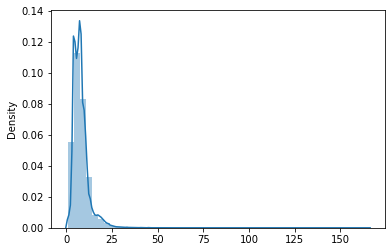

In [28]:
# Density plot

doc_len = [len(doc) for doc in state3]
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [33]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]


tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=.97,
                       min_df=3,
                       tokenizer=tokenize
                       )

dtm = tfidf.fit_transform(state3)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

$    +  .\n\nabout  .\n\nperks\n\nhealth  /or    0    1   10  100  \
0  0.0  0.0         0.0                   0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0         0.0                   0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0         0.0                   0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0         0.0                   0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0         0.0                   0.0  0.0  0.0  0.0  0.0  0.0   

   100,000  ...  you\xe2\x80\x99re  you\xe2\x80\x99ve  young   yr  zeus   zf  \
0      0.0  ...                0.0                0.0    0.0  0.0   0.0  0.0   
1      0.0  ...                0.0                0.0    0.0  0.0   0.0  0.0   
2      0.0  ...                0.0                0.0    0.0  0.0   0.0  0.0   
3      0.0  ...                0.0                0.0    0.0  0.0   0.0  0.0   
4      0.0  ...                0.0                0.0    0.0  0.0   0.0  0.0   

   zf\xe2\x80\x99s  zillow    |   ||  
0              0.0     0.0  0.0  0.0  
1              0.0     0.0  0.0  0.0  
2              0.0     0.0  0.0  0.0  
3              0.0     0.0  0.0  0.0  
4              0.0     0.0  0.0  0.0  

[5 rows x 3567 columns]

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [34]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)



NearestNeighbors(algorithm='kd_tree')

In [35]:
article = ["""
Remote position will create, improve, support/maintain the infrastructures of initiatives, and leverage the language to ease/reduce human-intervention in both technical/non-technical processes. Need one year of software development background.
"""]
new = tfidf.transform(article)

In [36]:
new

<1x3567 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [37]:
nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1.]]),
 array([[7604, 7491, 7564, 7585, 7580]], dtype=int64))

In [38]:
state3[7604]

'credential'

In [40]:
state3[7580:7700]

['make',
 'human',
 'decision',
 'making',
 'scalable',
 'feasible.\\n\\nrequired',
 'Job',
 'Qualifications:\\nBachelor\\',
 'degree',
 '3',
 'year',
 'work',
 'experience',
 'mathematical',
 'statistical',
 'computer',
 'science',
 'engineering',
 'physics',
 'economic',
 'relate',
 'quantitative',
 'field',
 'actuarial',
 'credential',
 'Masters',
 'degree',
 '2',
 'year',
 'work',
 'experience',
 'mathematical',
 'statistical',
 'computer',
 'science',
 'engineering',
 'physics',
 'economic',
 'relate',
 'quantitative',
 'field',
 'ph.d.',
 'mathematical',
 'statistical',
 'computer',
 'science',
 'engineering',
 'physics',
 'economic',
 'relate',
 'quantitative',
 'field',
 '6',
 'yearsexperience',
 'advanced',
 'mathematical',
 'statistical',
 'computer',
 'science',
 'engineering',
 'physics',
 'economic',
 'relate',
 'quantitative',
 'field',
 'strong',
 'learning',
 'growth',
 'mindsetcustomer',
 'focusedstrong',
 'interpersonal',
 'verbal',
 'write',
 'communication',
 'skill

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 